In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HW2

Mounted at /content/drive
/content/drive/MyDrive/HW2


In [3]:
import pandas as pd
import time
#we store the start time of the script.
start_time= time.time()
#we initialise an empty list
tags_list = []
# we take a chunk size
chunk_size = 20000
# we initialize an empty list to store chunks
lists = pd.DataFrame()
# We Loop through each chunk and append it to the result dataframe
with open('list.json', 'r') as lists_set:
  for chunk in pd.read_json(lists_set, lines=True, chunksize=chunk_size):
        # We have to Flatten the lists of tags and extend the tags_list
        for tags in chunk['tags']:
            if isinstance(tags, list):
                tags_list.extend(tags)
tags_df = pd.DataFrame({'tags': tags_list})
tags_df.dropna(inplace=True)
# We now will count the usage of each tag
tag_counts = tags_df['tags'].value_counts().reset_index()
tag_counts.columns = ['tag', '#usage']
# We will Sort the DataFrame by usage count in descending order
sorted_tags = tag_counts.sort_values(by='#usage', ascending=False)

end_time= time.time()
# then we print the top tags and time taken
print(sorted_tags.head(5))
print(f"Time taken: {end_time - start_time:.2f} seconds")

               tag  #usage
0          romance    6001
1          fiction    5291
2      young-adult    5016
3          fantasy    3666
4  science-fiction    2779
Time taken: 74.91 seconds


I have used this as a script file in the name of aws_solution.py and have run the script from the command line. This is the attached screenshot below:
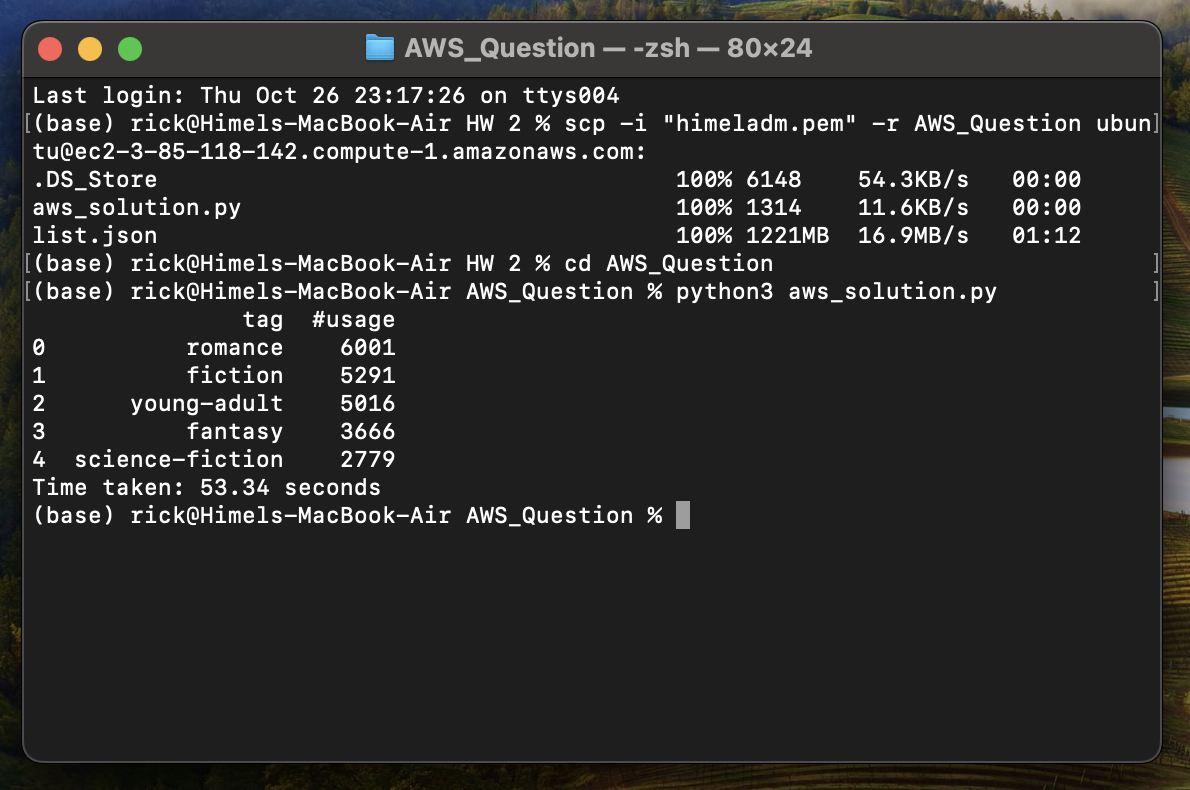

As evident from the screenshot, the result came as expected and took 53.34 seconds in my own macbook.

Then I have created an AWS EC2 instance with the following specifications:

t3.large, volume=30giB
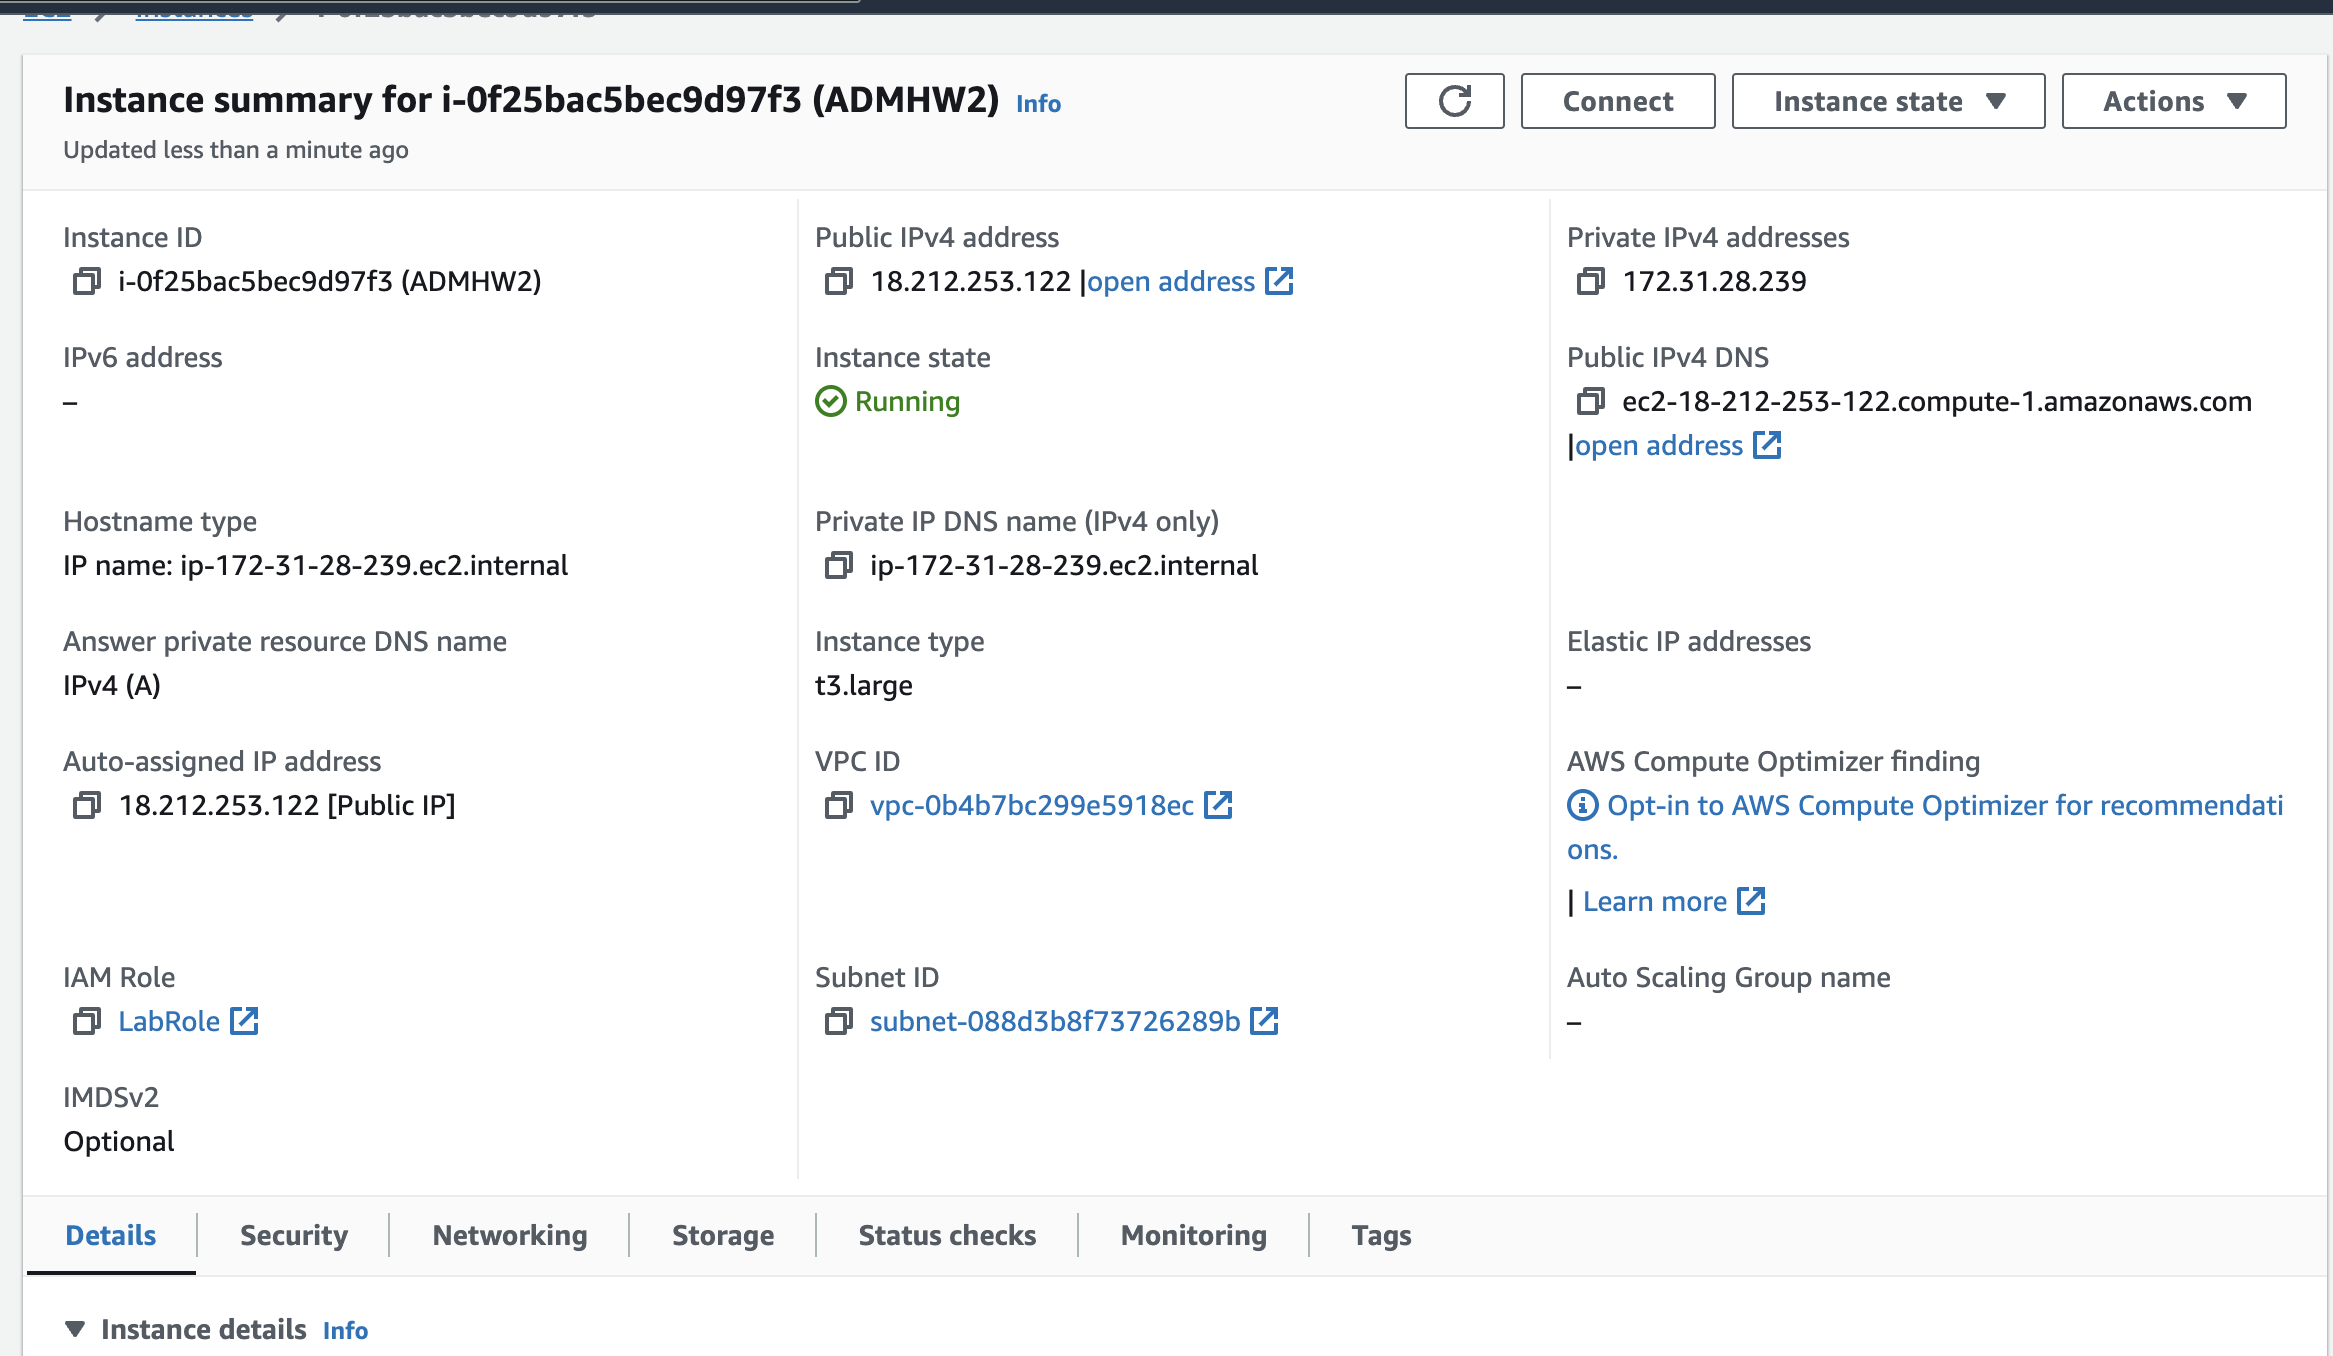

Then I copied the AWS folder containing the necessary files from my system to EC2 instance after connecting to it from the command line as in the following screenshots:
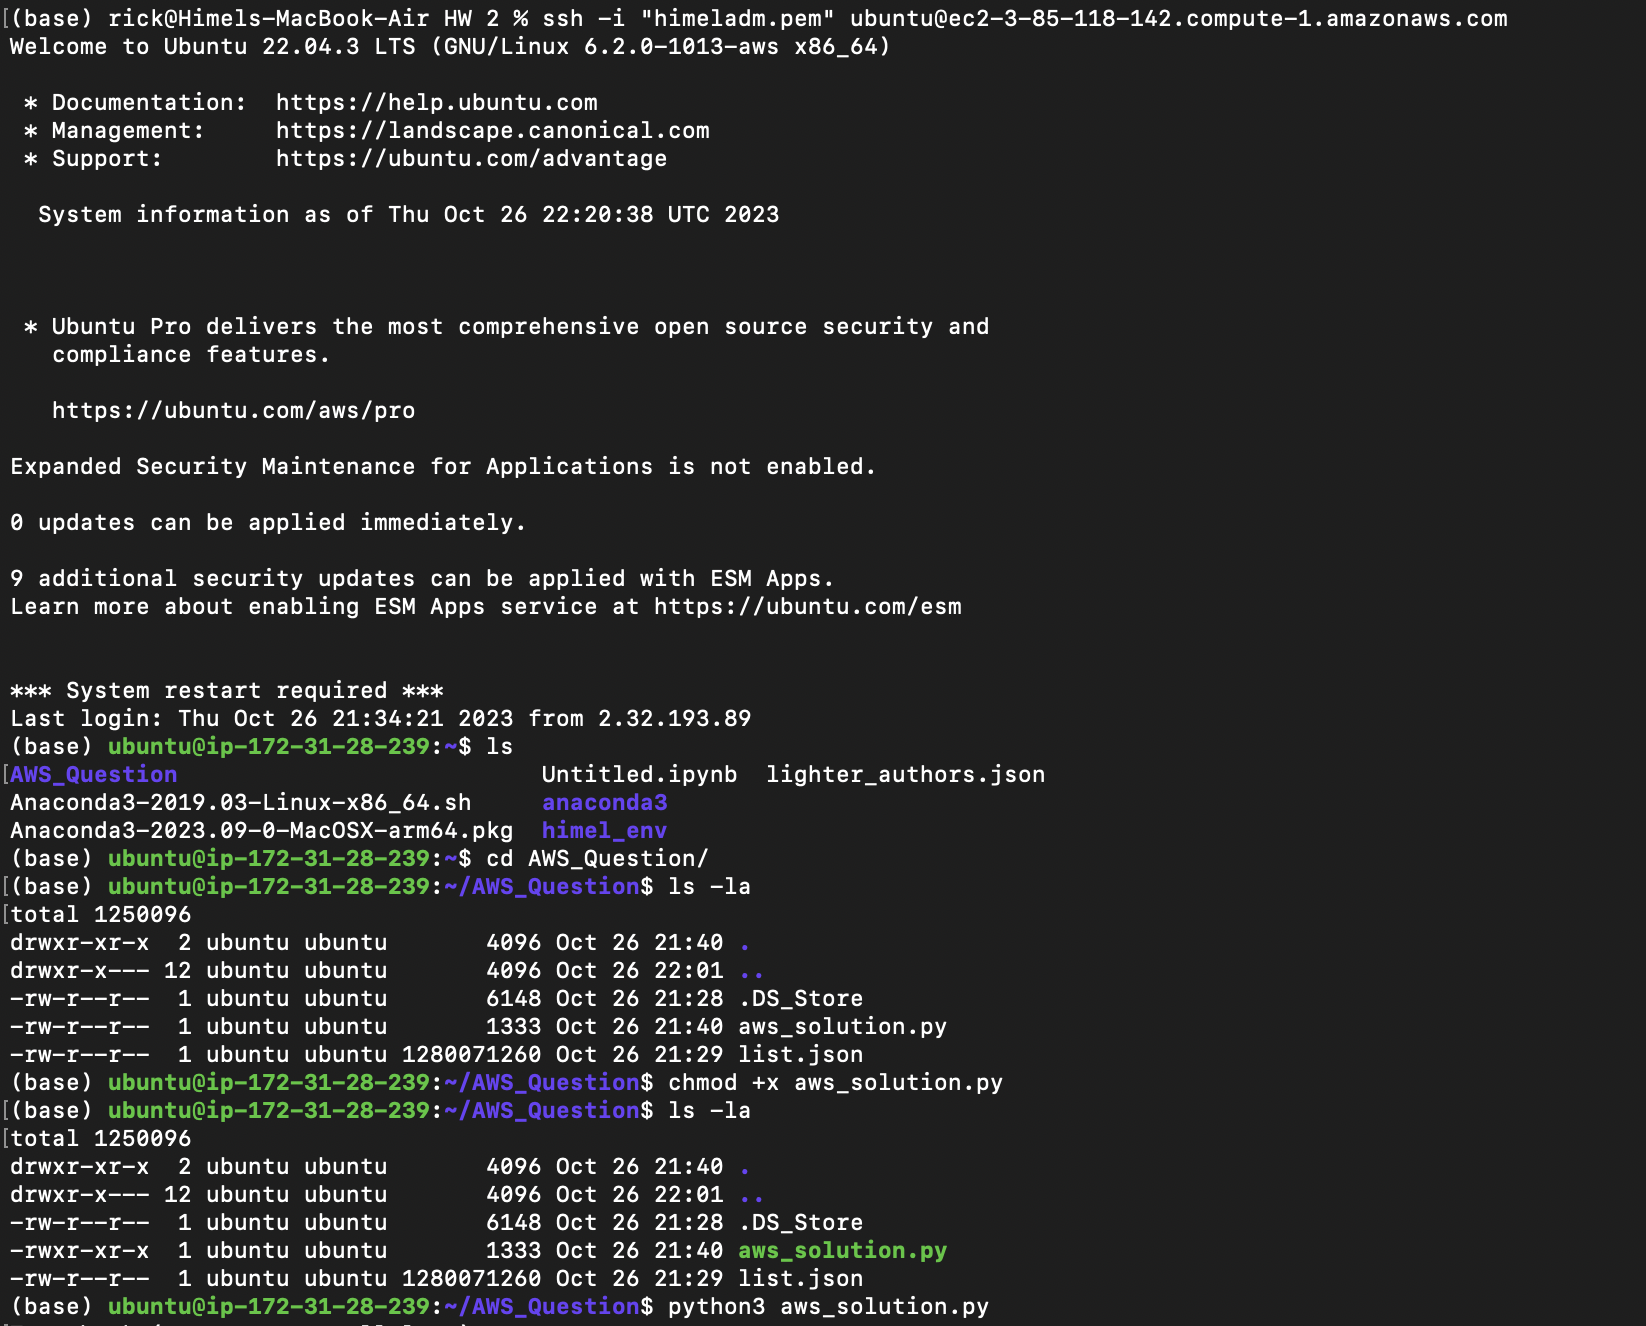



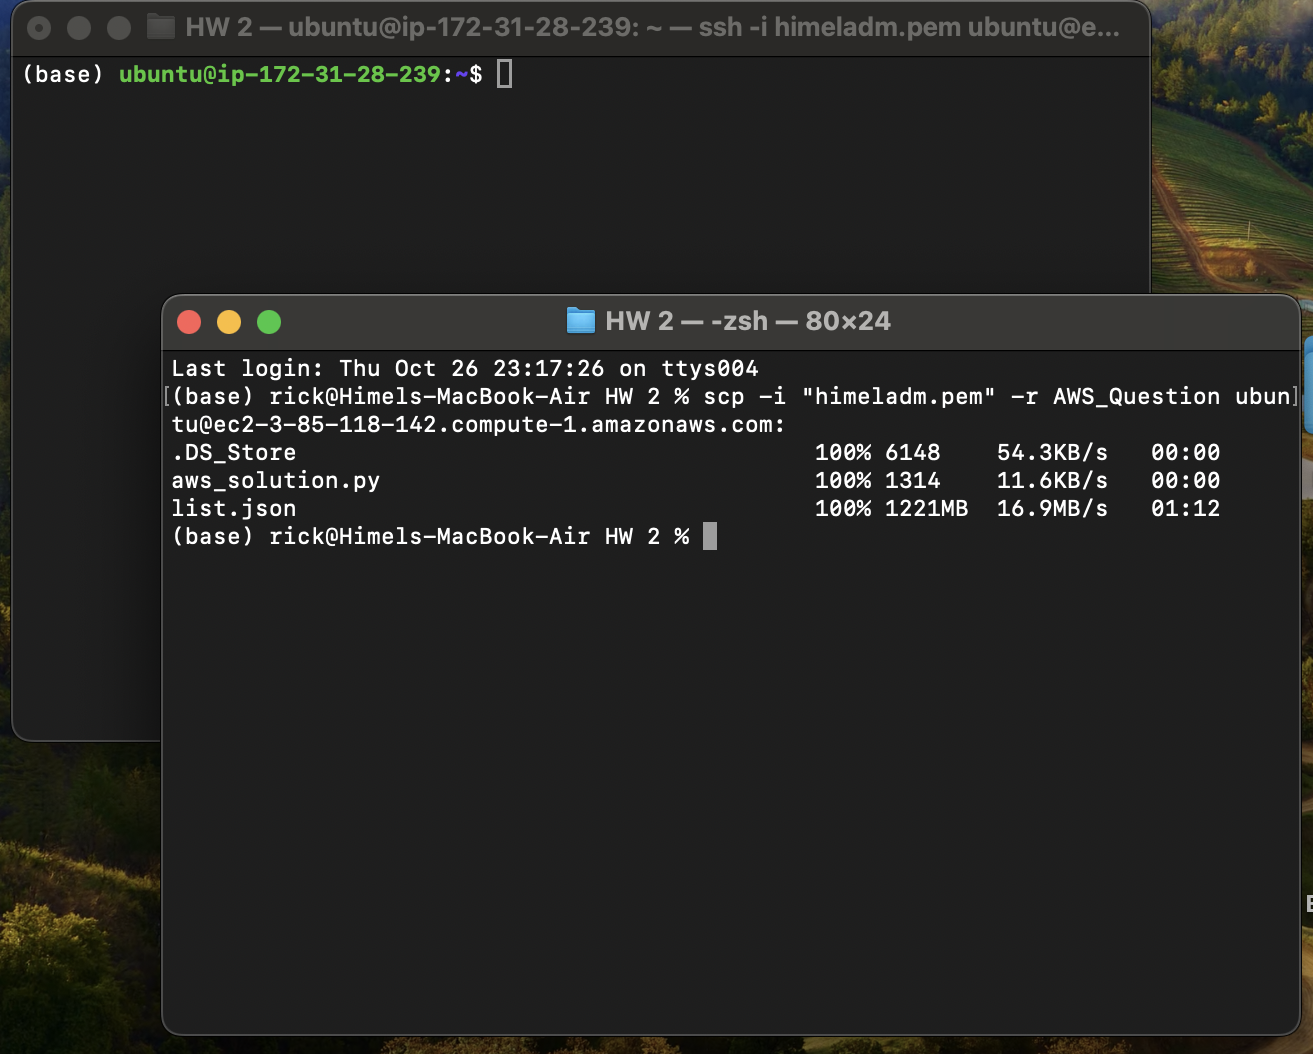

Then I run the script commands in the aws ubuntu:

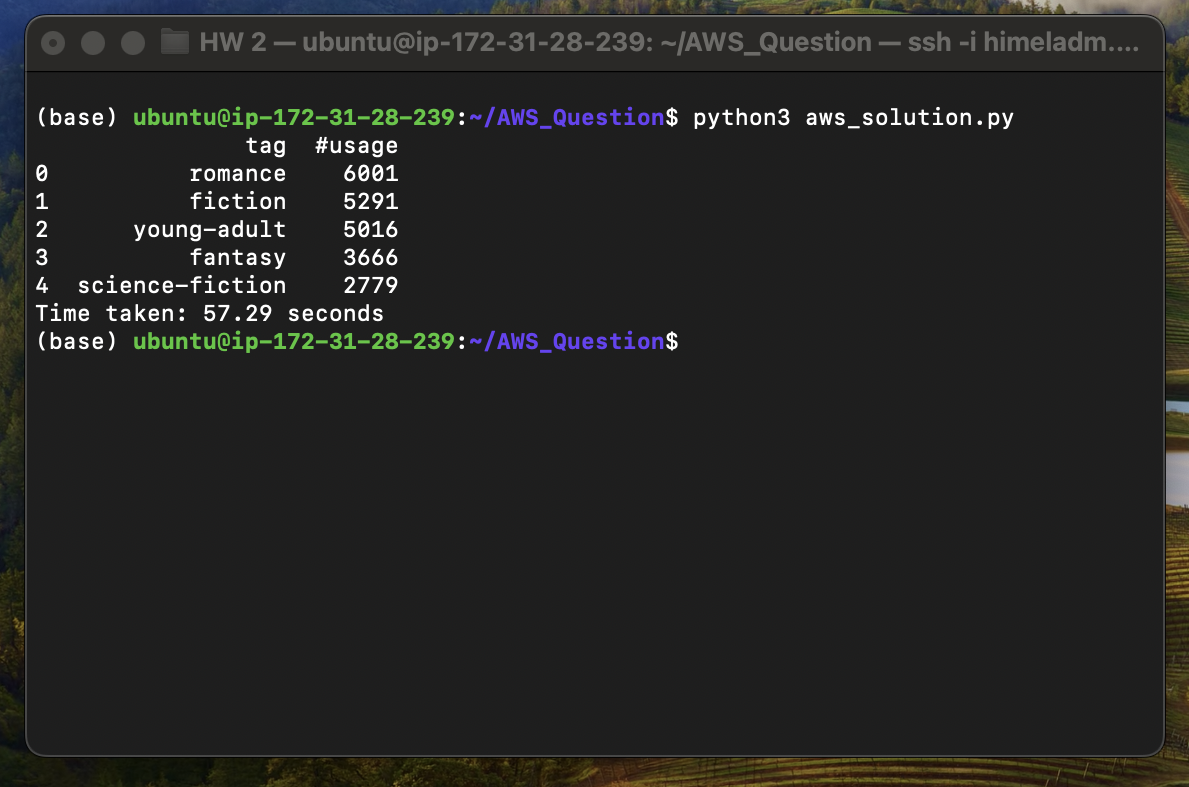

**In the EC2 ubuntu, it took 57.29 seconds to run the same script while it took 53.34 seconds in my own macbook.**